In [106]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

%matplotlib inline

In [2]:
# Carregando o DATAFRAME
df_nba = pd.read_csv('NBA_Players.csv')

In [3]:
# Vendo os dados
df_nba.head(5)

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,http://www.espn.com/nba/player/_/id/2968439,SF,31,208.28,117.65,Washington State,"5,193,600",...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
1,Boston Celtics,Justin Bibbs,0,http://www.espn.com/nba/player/_/id/3147500,G,22,195.58,99.55,Virginia Tech,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
2,Boston Celtics,Jabari Bird,1,http://www.espn.com/nba/player/_/id/3064308,SG,24,198.12,89.59,California,"1,349,464",...,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
3,Boston Celtics,Jaylen Brown,2,http://www.espn.com/nba/player/_/id/3917376,F,21,200.66,99.55,California,"5,169,960",...,0.461,1.1-3.0,0.379,1.6-2.4,0.658,1.2,0.3,0.7,1.3,10.4
4,Boston Celtics,PJ Dozier,1,http://www.espn.com/nba/player/_/id/3923250,PG,21,198.12,92.76,South Carolina,Not signed,...,0.500,0.0-0.0,0.000,0.0-0.0,0.000,0.0,0.0,0.0,0.5,1.0


In [4]:
# Vendo colunas
df_nba.columns

Index(['TEAM', ' NAME', ' EXPERIENCE', ' URL', ' POSITION', ' AGE', ' HT',
       ' WT', ' COLLEGE', ' SALARY', ' PPG_LAST_SEASON', ' APG_LAST_SEASON',
       ' RPG_LAST_SEASON', ' PER_LAST_SEASON', ' PPG_CAREER', ' APG_CAREER',
       ' RGP_CAREER', ' GP', ' MPG', ' FGM_FGA', ' FGP', ' THM_THA', ' THP',
       ' FTM_FTA', ' FTP', ' APG', ' BLKPG', ' STLPG', ' TOPG', ' PPG'],
      dtype='object')

In [5]:
# Removendo espaços da descrição das colunas
df_nba.columns = df_nba.columns.str.replace(' ', '')
df_nba.columns

Index(['TEAM', 'NAME', 'EXPERIENCE', 'URL', 'POSITION', 'AGE', 'HT', 'WT',
       'COLLEGE', 'SALARY', 'PPG_LAST_SEASON', 'APG_LAST_SEASON',
       'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER',
       'RGP_CAREER', 'GP', 'MPG', 'FGM_FGA', 'FGP', 'THM_THA', 'THP',
       'FTM_FTA', 'FTP', 'APG', 'BLKPG', 'STLPG', 'TOPG', 'PPG'],
      dtype='object')

In [6]:
# Verificando tipos de dados
df_nba.info()

# Observa-se que algumas colunas que deveriam ter o tipo de dados como float apresenta o tipo object, iremos investigar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 30 columns):
TEAM               550 non-null object
NAME               550 non-null object
EXPERIENCE         550 non-null int64
URL                550 non-null object
POSITION           550 non-null object
AGE                550 non-null object
HT                 550 non-null float64
WT                 550 non-null float64
COLLEGE            550 non-null object
SALARY             550 non-null object
PPG_LAST_SEASON    538 non-null float64
APG_LAST_SEASON    538 non-null float64
RPG_LAST_SEASON    538 non-null float64
PER_LAST_SEASON    538 non-null float64
PPG_CAREER         550 non-null float64
APG_CAREER         550 non-null float64
RGP_CAREER         550 non-null float64
GP                 550 non-null int64
MPG                550 non-null float64
FGM_FGA            550 non-null object
FGP                550 non-null float64
THM_THA            550 non-null object
THP                550 non-n

In [7]:
# Verificando quantidade de campos nulos
df_nba.isnull().sum()

TEAM                0
NAME                0
EXPERIENCE          0
URL                 0
POSITION            0
AGE                 0
HT                  0
WT                  0
COLLEGE             0
SALARY              0
PPG_LAST_SEASON    12
APG_LAST_SEASON    12
RPG_LAST_SEASON    12
PER_LAST_SEASON    12
PPG_CAREER          0
APG_CAREER          0
RGP_CAREER          0
GP                  0
MPG                 0
FGM_FGA             0
FGP                 0
THM_THA             0
THP                 0
FTM_FTA             0
FTP                 0
APG                 0
BLKPG               0
STLPG               0
TOPG                0
PPG                 0
dtype: int64

In [8]:
#  Encontrando jogadores com valores nulos
df_nulos = df_nba.filter(['PPG_LAST_SEASON', 'APG_LAST_SEASON', 'RPG_LAST_SEASON', 'PER_LAST_SEASON']).isnull()
df_nulos = df_nulos[df_nulos.PPG_LAST_SEASON == True]
df_nulos

,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,PER_LAST_SEASON
50,True,True,True,True
257,True,True,True,True
276,True,True,True,True
309,True,True,True,True
332,True,True,True,True
335,True,True,True,True
347,True,True,True,True
448,True,True,True,True
473,True,True,True,True
482,True,True,True,True


In [9]:
# Extraindo os indices
indicesNulos = list(df_nulos.index)
indicesNulos

[50, 257, 276, 309, 332, 335, 347, 448, 473, 482, 484, 514]

In [10]:
# Verificando jogares
df_nba.loc[indicesNulos]

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
50,New York Knicks,John Jenkins,5,http://www.espn.com/nba/player/_/id/6594,SG,27,193.04,97.29,Vanderbilt,Not signed,...,0.448,0.7-1.8,0.364,0.7-0.8,0.849,0.8,0.1,0.2,0.6,5.1
257,Indiana Pacers,CJ Wilcox,3,http://www.espn.com/nba/player/_/id/2488999,SG,27,195.58,88.24,Washington,Not signed,...,0.370,0.3-0.9,0.333,0.2-0.2,0.813,0.5,0.1,0.2,0.3,2.0
276,Milwaukee Bucks,Christian Wood,2,http://www.espn.com/nba/player/_/id/3058254,PF,23,208.28,96.83,UNLV,Not signed,...,0.447,0.1-0.5,0.250,0.8-1.2,0.667,0.2,0.4,0.3,0.3,3.2
309,Houston Rockets,Brandon Knight,6,http://www.espn.com/nba/player/_/id/6448,PG,26,190.50,88.24,Kentucky,"14,631,250",...,0.415,1.6-4.6,0.357,2.6-3.3,0.812,4.3,0.2,0.9,2.7,15.2
332,Memphis Grizzlies,DJ Stephens,1,http://www.espn.com/nba/player/_/id/2489563,SG,27,195.58,85.07,Memphis,Not signed,...,0.429,0.0-0.0,0.000,0.3-0.3,1.000,0.0,0.0,0.0,0.0,2.3
335,New Orleans Pelicans,Alexis Ajinca,7,http://www.espn.com/nba/player/_/id/3410,C,30,218.44,112.22,-,"5,285,394",...,0.503,0.0-0.1,0.286,0.9-1.1,0.797,0.5,0.6,0.3,0.8,5.3
347,New Orleans Pelicans,Darius Morris,4,http://www.espn.com/nba/player/_/id/6463,PG,27,193.04,88.24,Michigan,Not signed,...,0.384,0.4-1.1,0.322,0.4-0.6,0.630,1.4,0.0,0.3,0.8,3.3
448,Washington Wizards,Jordan McRae,2,http://www.espn.com/nba/player/_/id/2531797,SG,27,195.58,81.00,Tennessee,Not signed,...,0.404,0.5-1.2,0.384,0.8-1.1,0.774,0.7,0.1,0.2,0.5,4.4
473,Denver Nuggets,Donald Sloan,5,http://www.espn.com/nba/player/_/id/4303,PG,30,190.50,92.76,Texas A&M,Not signed,...,0.409,0.4-1.4,0.310,0.9-1.2,0.754,3.0,0.0,0.4,1.1,5.5
482,Minnesota Timberwolves,Darius Johnson-Odom,2,http://www.espn.com/nba/player/_/id/6596,SG,29,187.96,92.31,Marquette,Not signed,...,0.000,0.0-0.6,0.000,0.0-0.3,0.000,0.3,0.0,0.1,0.3,0.0


In [11]:
# Excluindo jogadores com informações nulas da dataFrame oficial
df_nba.drop(indicesNulos, axis=0, inplace=True)
df_nba.isnull().sum()

TEAM               0
NAME               0
EXPERIENCE         0
URL                0
POSITION           0
AGE                0
HT                 0
WT                 0
COLLEGE            0
SALARY             0
PPG_LAST_SEASON    0
APG_LAST_SEASON    0
RPG_LAST_SEASON    0
PER_LAST_SEASON    0
PPG_CAREER         0
APG_CAREER         0
RGP_CAREER         0
GP                 0
MPG                0
FGM_FGA            0
FGP                0
THM_THA            0
THP                0
FTM_FTA            0
FTP                0
APG                0
BLKPG              0
STLPG              0
TOPG               0
PPG                0
dtype: int64

In [12]:
# Verificando informações gerais
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 549
Data columns (total 30 columns):
TEAM               538 non-null object
NAME               538 non-null object
EXPERIENCE         538 non-null int64
URL                538 non-null object
POSITION           538 non-null object
AGE                538 non-null object
HT                 538 non-null float64
WT                 538 non-null float64
COLLEGE            538 non-null object
SALARY             538 non-null object
PPG_LAST_SEASON    538 non-null float64
APG_LAST_SEASON    538 non-null float64
RPG_LAST_SEASON    538 non-null float64
PER_LAST_SEASON    538 non-null float64
PPG_CAREER         538 non-null float64
APG_CAREER         538 non-null float64
RGP_CAREER         538 non-null float64
GP                 538 non-null int64
MPG                538 non-null float64
FGM_FGA            538 non-null object
FGP                538 non-null float64
THM_THA            538 non-null object
THP                538 non-n

In [13]:
# Pegando colunas que tem tipos de dados Object
colunasObject = []
for i in df_nba.columns:
    if df_nba[i].dtype == 'O':
        colunasObject.append(i)

colunasObject

['TEAM',
 'NAME',
 'URL',
 'POSITION',
 'AGE',
 'COLLEGE',
 'SALARY',
 'FGM_FGA',
 'THM_THA',
 'FTM_FTA']

In [14]:
# Verificando informação das colunas que são do tipo Object

df_tipos_object = df_nba.filter(colunasObject, axis=1)
df_tipos_object

,TEAM,NAME,URL,POSITION,AGE,COLLEGE,SALARY,FGM_FGA,THM_THA,FTM_FTA
0,Boston Celtics,Aron Baynes,http://www.espn.com/nba/player/_/id/2968439,SF,31,Washington State,"5,193,600",2.2-4.3,0.0-0.1,1.0-1.3
1,Boston Celtics,Justin Bibbs,http://www.espn.com/nba/player/_/id/3147500,G,22,Virginia Tech,Not signed,0,0,0
2,Boston Celtics,Jabari Bird,http://www.espn.com/nba/player/_/id/3064308,SG,24,California,"1,349,464",1.2-2.0,0.2-0.5,0.5-1.0
3,Boston Celtics,Jaylen Brown,http://www.espn.com/nba/player/_/id/3917376,F,21,California,"5,169,960",3.8-8.3,1.1-3.0,1.6-2.4
4,Boston Celtics,PJ Dozier,http://www.espn.com/nba/player/_/id/3923250,PG,21,South Carolina,Not signed,0.5-1.0,0.0-0.0,0.0-0.0
...,...,...,...,...,...,...,...,...,...,...
545,Utah Jazz,Georges Niang,http://www.espn.com/nba/player/_/id/2990969,SF,25,Iowa State,"1,512,601",0.4-1.5,0.0-0.5,0.1-0.1
546,Utah Jazz,Royce O'Neale,http://www.espn.com/nba/player/_/id/2583632,SF,25,Baylor,"1,378,242",1.7-4.1,0.6-1.7,0.9-1.1
547,Utah Jazz,Ricky Rubio,http://www.espn.com/nba/player/_/id/4011,PG,27,-,"14,975,000",3.4-9.0,0.8-2.4,3.2-3.8
548,Utah Jazz,Thabo Sefolosha,http://www.espn.com/nba/player/_/id/3028,SF,34,-,"5,250,000",2.3-5.2,0.6-1.7,0.8-1.1


In [15]:
# Verificando se coluna NAME contém somente valores únicos
len(df_tipos_object.NAME.unique()) == df_tipos_object.shape[0]

True

In [16]:
# Analisando os dados únicos de cada coluna do dataFrame df_tipos_objects
# Verifica-se que tem jogadores sem idade e sem salário informados

times = df_tipos_object.TEAM.unique()
posicoes = df_tipos_object.POSITION.unique()
idades = df_tipos_object.AGE.unique()
salarios = df_tipos_object.SALARY.unique()

print(times, '\n')
print(posicoes, '\n')
print(idades, '\n')
print(salarios, '\n')

['Boston Celtics' 'Brooklyn Nets' 'New York Knicks' 'Philadelphia 76ers'
 'Toronto Raptors' 'Golden State Warriors' 'LA Clippers'
 'Los Angeles Lakers' 'Phoenix Suns' 'Sacramento Kings' 'Chicago Bulls'
 'Cleveland Cavaliers' 'Detroit Pistons' 'Indiana Pacers'
 'Milwaukee Bucks' 'Dallas Mavericks' 'Houston Rockets'
 'Memphis Grizzlies' 'New Orleans Pelicans' 'San Antonio Spurs'
 'Atlanta Hawks' 'Charlotte Hornets' 'Miami Heat' 'Orlando Magic'
 'Washington Wizards' 'Denver Nuggets' 'Minnesota Timberwolves'
 'Oklahoma City Thunder' 'Portland Trail Blazers' 'Utah Jazz'] 

['SF' 'G' 'SG' 'F' 'PG' 'PF' 'C'] 

['31' '22' '24' '21' '28' '32' '26' '23' '29' '20' '25' '33' '27' '19' '-'
 '30' '34' '18' '36' '37' '35' '40' '38' '41'] 

['5,193,600' 'Not signed' '1,349,464' '5,169,960' '31,214,295'
 '28,928,709' '20,099,189' '5,375,000' '1,378,242' '3,050,390'
 '11,660,716' '6,700,800' '838,464' '2,667,600' '2,034,120' '15,400,000'
 '18,500,000' '4,449,000' '1,656,092' '9,530,000' '13,764,045' '1,

In [17]:
# Verificando quais jogadores não tem idades informadas

df_nba[df_nba.AGE == '-']

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
44,New York Knicks,Phillip Carr,0,http://www.espn.com/nba/player/_/id/3913736,F,-,205.74,92.76,-,Not signed,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
296,Houston Rockets,Tim Bond,0,http://www.espn.com/nba/player/_/id/3148983,G,-,198.12,76.92,Eastern Michigan,Not signed,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Verificando quais jogadores não tem salário informado

df_nba[df_nba.SALARY == 'Not signed']

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
1,Boston Celtics,Justin Bibbs,0,http://www.espn.com/nba/player/_/id/3147500,G,22,195.58,99.55,Virginia Tech,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
4,Boston Celtics,PJ Dozier,1,http://www.espn.com/nba/player/_/id/3923250,PG,21,198.12,92.76,South Carolina,Not signed,...,0.500,0.0-0.0,0.000,0.0-0.0,0.000,0.0,0.0,0.0,0.5,1.0
5,Boston Celtics,Marcus Georges-Hunt,2,http://www.espn.com/nba/player/_/id/2982261,SG,24,195.58,102.26,Georgia Tech,Not signed,...,0.418,0.1-0.4,0.294,0.5-0.7,0.710,0.2,0.0,0.1,0.1,1.6
9,Boston Celtics,Nick King,0,http://www.espn.com/nba/player/_/id/3057182,F,23,200.66,101.81,Middle Tennessee,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
10,Boston Celtics,Walt Lemon Jr.,1,http://www.espn.com/nba/player/_/id/2528586,PG,26,190.50,81.45,Bradley,Not signed,...,0.438,0.2-0.2,1.000,0.4-0.6,0.667,1.0,0.2,0.0,0.8,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Utah Jazz,Isaiah Cousins,0,http://www.espn.com/nba/player/_/id/2990983,PG,24,193.04,86.43,Oklahoma,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
538,Utah Jazz,Isaac Haas,0,http://www.espn.com/nba/player/_/id/3136990,C,22,218.44,131.22,-,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
540,Utah Jazz,Trey Lewis,0,http://www.espn.com/nba/player/_/id/2579285,PG,25,187.96,83.71,Louisville,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
541,Utah Jazz,Jairus Lyles,0,http://www.espn.com/nba/player/_/id/3074787,PG,23,187.96,79.19,UMBC,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0


In [19]:
# Excluindo os jogadores sem salário informado garante também a exclusão dos que estão sem idade informada (102 atletas)
# Faremos isso abaixo

indicesColunasSemInformacao = list(df_tipos_object[df_tipos_object.SALARY == 'Not signed'].index)
df_nba.drop(indicesColunasSemInformacao, axis=0, inplace=True)

In [20]:
# Verificando se só temos dados válidos nas colunas que são do tipos objects

times = df_nba.TEAM.unique()
posicoes = df_nba.POSITION.unique()
idades = df_nba.AGE.unique()
salarios = df_nba.SALARY.unique()

print(times, '\n')
print(posicoes, '\n')
print(idades, '\n')
print(salarios, '\n')

['Boston Celtics' 'Brooklyn Nets' 'New York Knicks' 'Philadelphia 76ers'
 'Toronto Raptors' 'Golden State Warriors' 'LA Clippers'
 'Los Angeles Lakers' 'Phoenix Suns' 'Sacramento Kings' 'Chicago Bulls'
 'Cleveland Cavaliers' 'Detroit Pistons' 'Indiana Pacers'
 'Milwaukee Bucks' 'Dallas Mavericks' 'Houston Rockets'
 'Memphis Grizzlies' 'New Orleans Pelicans' 'San Antonio Spurs'
 'Atlanta Hawks' 'Charlotte Hornets' 'Miami Heat' 'Orlando Magic'
 'Washington Wizards' 'Denver Nuggets' 'Minnesota Timberwolves'
 'Oklahoma City Thunder' 'Portland Trail Blazers' 'Utah Jazz'] 

['SF' 'SG' 'F' 'PF' 'PG' 'C' 'G'] 

['31' '24' '21' '28' '32' '26' '29' '23' '20' '22' '25' '33' '27' '19'
 '30' '34' '18' '36' '37' '35' '40' '38' '41'] 

['5,193,600' '1,349,464' '5,169,960' '31,214,295' '28,928,709'
 '20,099,189' '5,375,000' '1,378,242' '3,050,390' '11,660,716' '6,700,800'
 '838,464' '2,667,600' '2,034,120' '15,400,000' '18,500,000' '4,449,000'
 '1,656,092' '9,530,000' '13,764,045' '1,512,601' '8,000,0

In [21]:
# Convertendo SALARY e AGE para número

df_nba.SALARY = df_nba.SALARY.str.replace(',', '').astype(float)
df_nba.AGE = df_nba.AGE.astype(int)

In [22]:
# Excluindo colunas que não participarão das análises de correlação
# Estas colunas ou não tem valor para ser correlacionada ou o dado está num formato não numério ou é contém dado informação que se repete

df_nba.drop(columns=['URL', 'COLLEGE', 'THM_THA', 'FTM_FTA', 'FGM_FGA', 'PPG', 'APG'], inplace=True)
df_nba

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,...,APG_CAREER,RGP_CAREER,GP,MPG,FGP,THP,FTP,BLKPG,STLPG,TOPG
0,Boston Celtics,Aron Baynes,6,SF,31,208.28,117.65,5193600.0,6.0,1.1,...,0.7,4.4,376,15.0,0.502,0.143,0.802,0.5,0.2,0.8
2,Boston Celtics,Jabari Bird,1,SG,24,198.12,89.59,1349464.0,3.0,0.6,...,0.6,1.5,13,8.8,0.577,0.429,0.462,0.1,0.2,0.6
3,Boston Celtics,Jaylen Brown,2,F,21,200.66,99.55,5169960.0,14.5,1.6,...,1.2,3.8,148,23.6,0.461,0.379,0.658,0.3,0.7,1.3
6,Boston Celtics,Gordon Hayward,8,SF,28,203.20,101.81,31214295.0,2.0,0.0,...,3.4,4.2,517,31.3,0.444,0.368,0.820,0.4,1.0,2.0
7,Boston Celtics,Al Horford,11,PF,32,208.28,110.86,28928709.0,12.9,7.4,...,8.6,1.2,718,33.2,0.525,0.370,0.750,1.2,0.8,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Utah Jazz,Georges Niang,2,SF,25,203.20,104.07,1512601.0,1.0,0.3,...,0.3,0.8,32,3.9,0.277,0.063,0.750,0.0,0.2,0.3
546,Utah Jazz,Royce O'Neale,1,SF,25,198.12,102.26,1378242.0,5.0,1.4,...,1.4,3.4,69,16.7,0.423,0.356,0.803,0.2,0.5,0.8
547,Utah Jazz,Ricky Rubio,7,PG,27,193.04,85.97,14975000.0,13.1,5.3,...,7.9,4.3,430,31.3,0.385,0.325,0.836,0.1,2.0,2.8
548,Utah Jazz,Thabo Sefolosha,12,SF,34,200.66,99.55,5250000.0,8.2,0.9,...,1.5,3.9,778,23.2,0.449,0.347,0.737,0.4,1.1,0.9


In [23]:
# Agora temos 436 linhas e 23 colunas, enquanto o inicial tinha 550 linhas e 30 colunas
df_nba.shape

(436, 23)

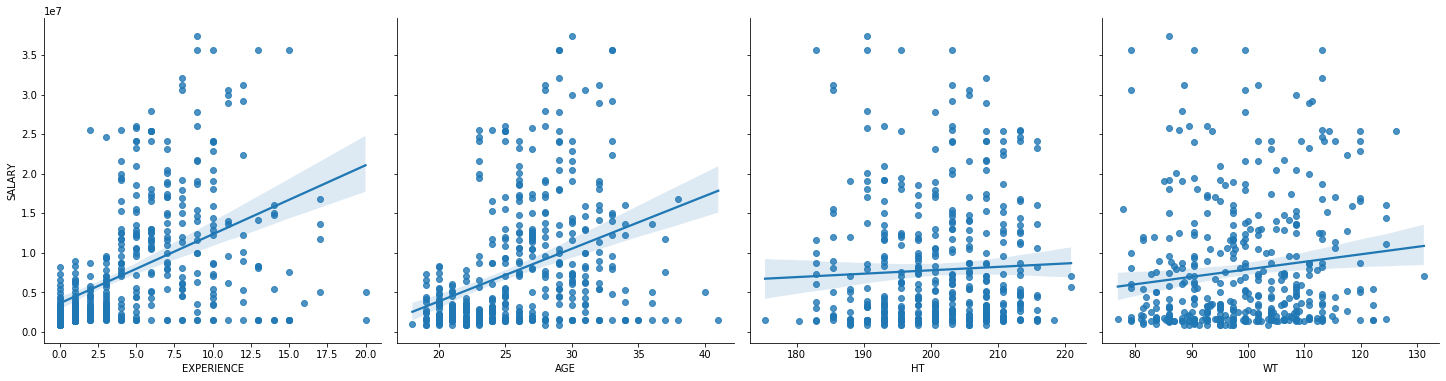

In [100]:
# Visualizando as correlações com SALARY
X = ['EXPERIENCE', 'AGE', 'HT', 'WT']
Y = ['SALARY']

sb.pairplot(df_nba, x_vars=X, y_vars=Y, kind="reg", height=5)

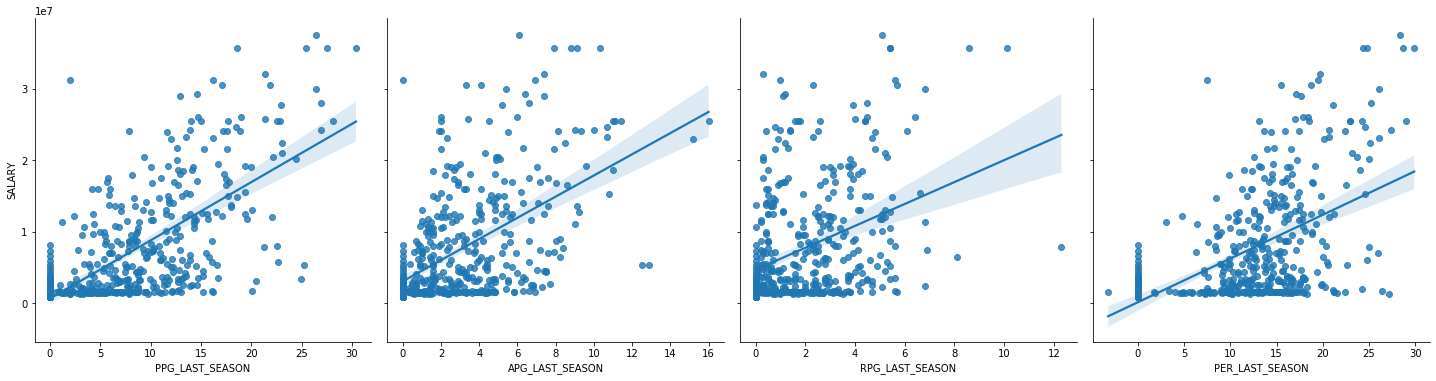

In [99]:
# Visualizando as correlações com SALARY
X = ['PPG_LAST_SEASON', 'APG_LAST_SEASON', 'RPG_LAST_SEASON', 'PER_LAST_SEASON']
Y = ['SALARY']

sb.pairplot(df_nba, x_vars=X, y_vars=Y, kind="reg", height=5)

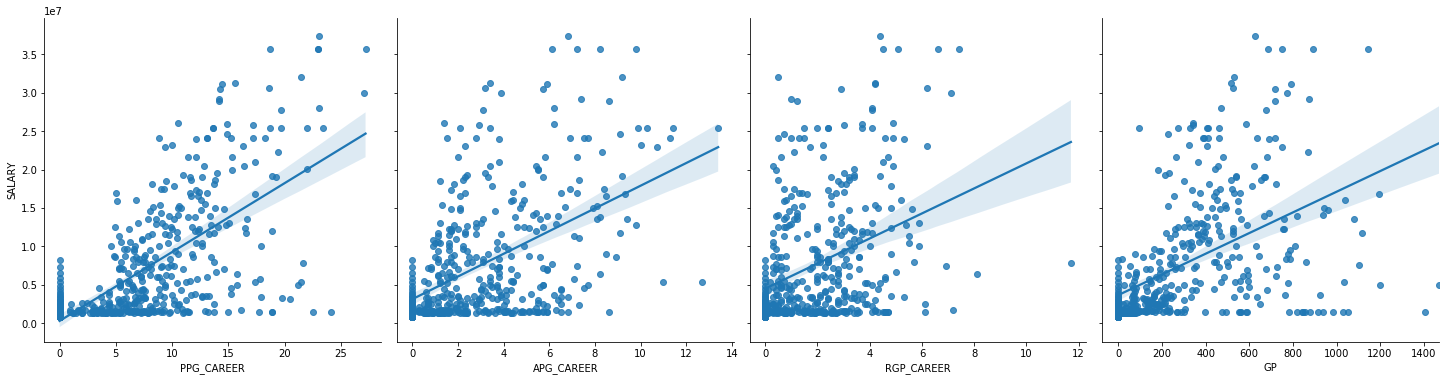

In [98]:
# Visualizando as correlações com SALARY
X = ['PPG_CAREER', 'APG_CAREER', 'RGP_CAREER', 'GP']
Y = ['SALARY']

sb.pairplot(df_nba, x_vars=X, y_vars=Y, kind="reg", height=5)

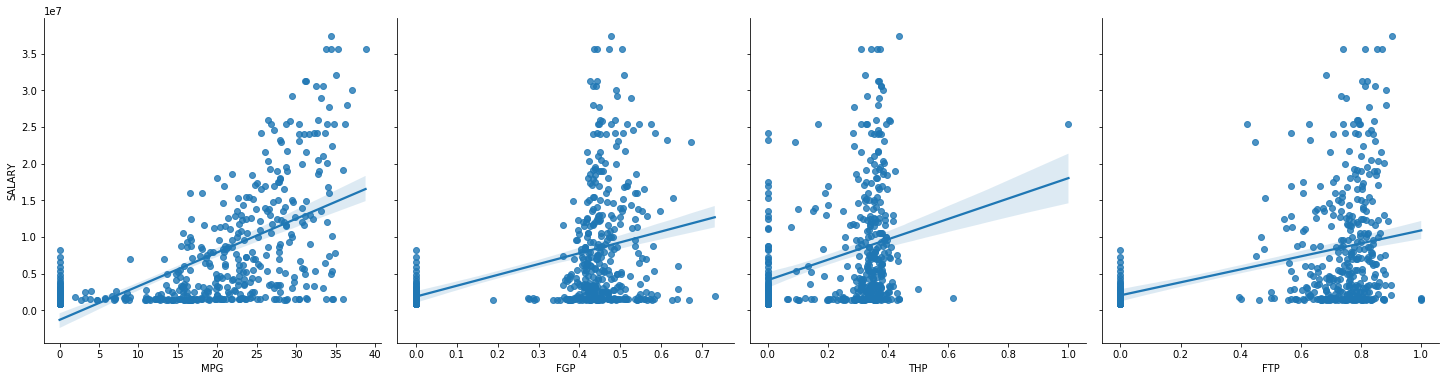

In [101]:
# Visualizando as correlações com SALARY
X = ['MPG', 'FGP', 'THP', 'FTP']
Y = ['SALARY']

sb.pairplot(df_nba, x_vars=X, y_vars=Y, kind="reg", height=5)

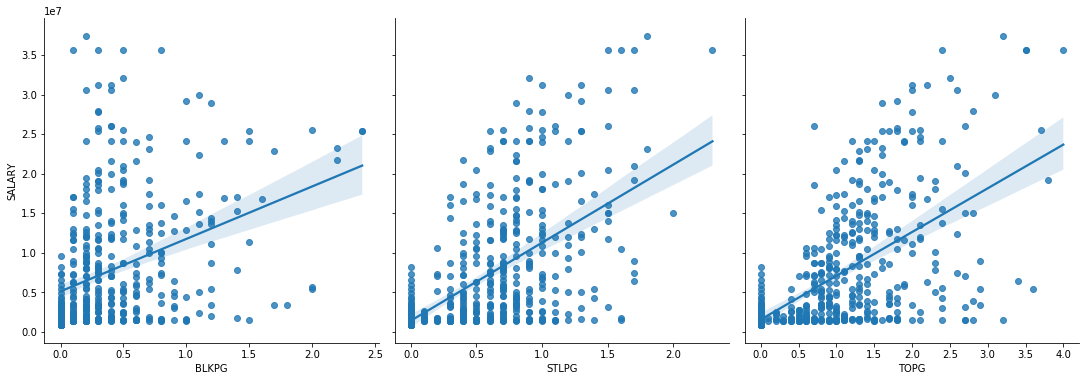

In [104]:
# Visualizando as correlações com SALARY
X = ['BLKPG', 'STLPG', 'TOPG']
Y = ['SALARY']

sb.pairplot(df_nba, x_vars=X, y_vars=Y, kind="reg", height=5)

In [52]:
# Verificando as correlações através da fórmula de PEARSON
correlacoes = []
df_correlacao = df_nba.drop(columns=['NAME','TEAM', 'POSITION'])
for i in df_correlacao.columns:
    correlacoes.append((df_correlacao['SALARY'].corr(df_correlacao[i]), i))

correlacoes.sort(reverse=True)
correlacoes

[(0.9999999999999999, 'SALARY'),
 (0.655676397969779, 'PPG_LAST_SEASON'),
 (0.6372256737551588, 'PPG_CAREER'),
 (0.5849923238560933, 'MPG'),
 (0.5515693862593791, 'TOPG'),
 (0.5329677147941675, 'STLPG'),
 (0.5229449344237321, 'APG_LAST_SEASON'),
 (0.5047945352497611, 'PER_LAST_SEASON'),
 (0.4958263491929498, 'APG_CAREER'),
 (0.49027986931276785, 'GP'),
 (0.45959857080706235, 'EXPERIENCE'),
 (0.3660154087928164, 'AGE'),
 (0.36047370428740527, 'RPG_LAST_SEASON'),
 (0.3562143720211878, 'RGP_CAREER'),
 (0.3523585623035294, 'BLKPG'),
 (0.2967581310929169, 'FGP'),
 (0.2931791234233112, 'FTP'),
 (0.2625040860060568, 'THP'),
 (0.12767084347920352, 'WT'),
 (0.04574213043579767, 'HT')]

In [56]:
team = df_nba.TEAM.unique()

In [68]:
mapa = {}
num = 1
for i in team:
    mapa[i] = num
    num =+ num + 1
mapa


{'Boston Celtics': 1,
 'Brooklyn Nets': 2,
 'New York Knicks': 3,
 'Philadelphia 76ers': 4,
 'Toronto Raptors': 5,
 'Golden State Warriors': 6,
 'LA Clippers': 7,
 'Los Angeles Lakers': 8,
 'Phoenix Suns': 9,
 'Sacramento Kings': 10,
 'Chicago Bulls': 11,
 'Cleveland Cavaliers': 12,
 'Detroit Pistons': 13,
 'Indiana Pacers': 14,
 'Milwaukee Bucks': 15,
 'Dallas Mavericks': 16,
 'Houston Rockets': 17,
 'Memphis Grizzlies': 18,
 'New Orleans Pelicans': 19,
 'San Antonio Spurs': 20,
 'Atlanta Hawks': 21,
 'Charlotte Hornets': 22,
 'Miami Heat': 23,
 'Orlando Magic': 24,
 'Washington Wizards': 25,
 'Denver Nuggets': 26,
 'Minnesota Timberwolves': 27,
 'Oklahoma City Thunder': 28,
 'Portland Trail Blazers': 29,
 'Utah Jazz': 30}

In [84]:
df_nba.NAME.duplicated().sum()
df_nba.select_dtypes(include=['object'])

,TEAM,NAME,POSITION
0,Boston Celtics,Aron Baynes,SF
2,Boston Celtics,Jabari Bird,SG
3,Boston Celtics,Jaylen Brown,F
6,Boston Celtics,Gordon Hayward,SF
7,Boston Celtics,Al Horford,PF
...,...,...,...
545,Utah Jazz,Georges Niang,SF
546,Utah Jazz,Royce O'Neale,SF
547,Utah Jazz,Ricky Rubio,PG
548,Utah Jazz,Thabo Sefolosha,SF


In [69]:
mapa['Boston Celtics']

1

In [85]:
df_nba.TEAM.fillna(value=mapa, inplace=True)
df_nba

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,...,APG_CAREER,RGP_CAREER,GP,MPG,FGP,THP,FTP,BLKPG,STLPG,TOPG
0,Boston Celtics,Aron Baynes,6,SF,31,208.28,117.65,5193600.0,6.0,1.1,...,0.7,4.4,376,15.0,0.502,0.143,0.802,0.5,0.2,0.8
2,Boston Celtics,Jabari Bird,1,SG,24,198.12,89.59,1349464.0,3.0,0.6,...,0.6,1.5,13,8.8,0.577,0.429,0.462,0.1,0.2,0.6
3,Boston Celtics,Jaylen Brown,2,F,21,200.66,99.55,5169960.0,14.5,1.6,...,1.2,3.8,148,23.6,0.461,0.379,0.658,0.3,0.7,1.3
6,Boston Celtics,Gordon Hayward,8,SF,28,203.20,101.81,31214295.0,2.0,0.0,...,3.4,4.2,517,31.3,0.444,0.368,0.820,0.4,1.0,2.0
7,Boston Celtics,Al Horford,11,PF,32,208.28,110.86,28928709.0,12.9,7.4,...,8.6,1.2,718,33.2,0.525,0.370,0.750,1.2,0.8,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Utah Jazz,Georges Niang,2,SF,25,203.20,104.07,1512601.0,1.0,0.3,...,0.3,0.8,32,3.9,0.277,0.063,0.750,0.0,0.2,0.3
546,Utah Jazz,Royce O'Neale,1,SF,25,198.12,102.26,1378242.0,5.0,1.4,...,1.4,3.4,69,16.7,0.423,0.356,0.803,0.2,0.5,0.8
547,Utah Jazz,Ricky Rubio,7,PG,27,193.04,85.97,14975000.0,13.1,5.3,...,7.9,4.3,430,31.3,0.385,0.325,0.836,0.1,2.0,2.8
548,Utah Jazz,Thabo Sefolosha,12,SF,34,200.66,99.55,5250000.0,8.2,0.9,...,1.5,3.9,778,23.2,0.449,0.347,0.737,0.4,1.1,0.9


In [86]:
# Resentando os indices
df_nba.index = range(len(df_nba.index))

In [89]:
df_nba

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,...,APG_CAREER,RGP_CAREER,GP,MPG,FGP,THP,FTP,BLKPG,STLPG,TOPG
0,Boston Celtics,Aron Baynes,6,SF,31,208.28,117.65,5193600.0,6.0,1.1,...,0.7,4.4,376,15.0,0.502,0.143,0.802,0.5,0.2,0.8
1,Boston Celtics,Jabari Bird,1,SG,24,198.12,89.59,1349464.0,3.0,0.6,...,0.6,1.5,13,8.8,0.577,0.429,0.462,0.1,0.2,0.6
2,Boston Celtics,Jaylen Brown,2,F,21,200.66,99.55,5169960.0,14.5,1.6,...,1.2,3.8,148,23.6,0.461,0.379,0.658,0.3,0.7,1.3
3,Boston Celtics,Gordon Hayward,8,SF,28,203.20,101.81,31214295.0,2.0,0.0,...,3.4,4.2,517,31.3,0.444,0.368,0.820,0.4,1.0,2.0
4,Boston Celtics,Al Horford,11,PF,32,208.28,110.86,28928709.0,12.9,7.4,...,8.6,1.2,718,33.2,0.525,0.370,0.750,1.2,0.8,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,Utah Jazz,Georges Niang,2,SF,25,203.20,104.07,1512601.0,1.0,0.3,...,0.3,0.8,32,3.9,0.277,0.063,0.750,0.0,0.2,0.3
432,Utah Jazz,Royce O'Neale,1,SF,25,198.12,102.26,1378242.0,5.0,1.4,...,1.4,3.4,69,16.7,0.423,0.356,0.803,0.2,0.5,0.8
433,Utah Jazz,Ricky Rubio,7,PG,27,193.04,85.97,14975000.0,13.1,5.3,...,7.9,4.3,430,31.3,0.385,0.325,0.836,0.1,2.0,2.8
434,Utah Jazz,Thabo Sefolosha,12,SF,34,200.66,99.55,5250000.0,8.2,0.9,...,1.5,3.9,778,23.2,0.449,0.347,0.737,0.4,1.1,0.9


In [93]:
from sklearn.model_selection import train_test_split

test_size=0.2 # Test set size: 20%
random_state=42 # Random seed

df_treino,df_teste=train_test_split(df_nba,
                                    test_size=test_size,
                                    random_state=random_state) # Use if data is large enough

In [94]:
df_treino

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,...,APG_CAREER,RGP_CAREER,GP,MPG,FGP,THP,FTP,BLKPG,STLPG,TOPG
265,New Orleans Pelicans,Anthony Davis,6,PF,25,208.28,114.48,25434263.0,28.1,11.1,...,10.3,2.4,410,34.8,0.517,0.309,0.795,2.4,1.3,1.8
405,Oklahoma City Thunder,Russell Westbrook,10,PG,29,190.50,90.50,35654150.0,25.4,10.3,...,8.2,6.6,748,34.4,0.435,0.311,0.814,0.3,1.7,4.0
31,New York Knicks,Trey Burke,5,PG,25,185.42,79.19,1795015.0,12.8,4.7,...,3.8,2.1,303,24.4,0.404,0.339,0.791,0.1,0.6,1.4
84,Golden State Warriors,Shaun Livingston,13,PG,33,200.66,86.88,8307692.0,5.5,2.0,...,3.1,2.4,769,21.1,0.485,0.183,0.794,0.4,0.7,1.3
299,Atlanta Hawks,Daniel Hamilton,1,SG,23,200.66,88.24,1349383.0,2.0,1.3,...,1.3,0.8,6,4.7,0.455,0.400,0.000,0.0,0.2,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Toronto Raptors,Jonas Valanciunas,6,C,26,213.36,119.91,16539326.0,12.7,8.6,...,8.5,1.0,440,25.5,0.558,0.397,0.785,1.0,0.4,1.5
106,Los Angeles Lakers,Isaac Bonga,0,PG,18,203.20,81.45,1000000.0,0.0,0.0,...,0.0,0.0,0,0.0,0.000,0.000,0.000,0.0,0.0,0.0
270,New Orleans Pelicans,Darius Miller,4,SF,28,203.20,101.81,2205000.0,7.8,1.4,...,1.1,1.6,184,18.5,0.435,0.394,0.856,0.2,0.4,0.6
348,Orlando Magic,Jonathon Simmons,3,SF,29,198.12,88.24,6000000.0,13.9,2.5,...,1.8,2.5,202,21.0,0.459,0.331,0.759,0.2,0.6,1.4


In [95]:
df_teste

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,...,APG_CAREER,RGP_CAREER,GP,MPG,FGP,THP,FTP,BLKPG,STLPG,TOPG
395,Oklahoma City Thunder,Raymond Felton,13,PG,34,185.42,92.76,1512601.0,6.9,2.5,...,5.4,3.0,938,30.3,0.412,0.329,0.789,0.2,1.2,2.1
78,Golden State Warriors,Kevin Durant,11,SF,30,205.74,108.60,30000000.0,26.4,5.4,...,3.9,7.1,771,37.1,0.490,0.384,0.882,1.1,1.2,3.1
278,San Antonio Spurs,Marco Belinelli,11,SG,32,195.58,95.02,6153846.0,12.1,1.9,...,1.7,2.0,724,23.3,0.427,0.377,0.841,0.1,0.6,1.0
305,Atlanta Hawks,Taurean Prince,2,SF,24,203.20,99.55,2526840.0,14.1,2.6,...,1.9,3.9,141,24.4,0.420,0.374,0.825,0.5,0.9,1.8
325,Miami Heat,Udonis Haslem,15,PF,38,203.20,106.33,1512601.0,0.6,0.7,...,6.8,0.3,844,25.4,0.491,0.093,0.755,0.3,0.5,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Philadelphia 76ers,Ben Simmons,1,PG,22,208.28,104.07,6434520.0,15.8,8.2,...,8.2,8.1,81,33.7,0.545,0.000,0.560,0.9,1.7,3.4
137,Sacramento Kings,Bogdan Bogdanovic,1,SG,26,198.12,92.76,9000000.0,11.8,3.3,...,3.3,2.9,78,27.9,0.446,0.392,0.840,0.2,0.9,1.6
24,Brooklyn Nets,Rodions Kurucs,0,SF,20,205.74,95.02,1618320.0,0.0,0.0,...,0.0,0.0,0,0.0,0.000,0.000,0.000,0.0,0.0,0.0
17,Brooklyn Nets,Ed Davis,8,PF,29,208.28,101.81,4449000.0,5.3,7.4,...,6.5,0.9,559,20.6,0.564,0.000,0.579,0.9,0.5,0.8


In [154]:
modelo = linear_model.LinearRegression()

#Target
y = df_treino['SALARY']

x = df_treino[['MPG', 'TOPG', 'STLPG', 'APG_LAST_SEASON', 'EXPERIENCE', 'AGE', 'PPG_LAST_SEASON']]

In [155]:
modelo.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
resp = modelo.predict(x)

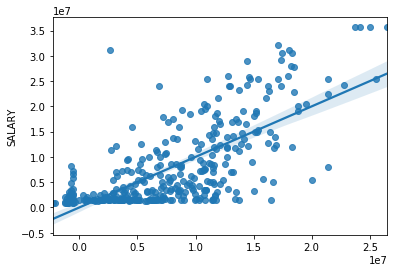

In [157]:
sb.regplot(x=resp, y=y, data=df_teste)

In [158]:
r2_score(y,resp)

0.49989397230593435

In [141]:
(resp == 0).sum()

0